In [1]:
import pandas as pd

In [2]:
import panel as pn

In [3]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas

In [4]:
import json

In [5]:
from scipy.special import softmax

In [6]:
%matplotlib inline

In [7]:
pn.extension(sizing_mode="stretch_width")

In [8]:
mcp = pd.DataFrame(json.loads('{"Purp":{"0":"HBWW, HBWB","1":"HBWW, HBWB","2":"HBWW, HBWB","3":"HBWW, HBWB","4":"HBWW, HBWB","5":"HBWW, HBWB","6":"HBWW, HBWB","7":"HBWW, HBWB","8":"HBWW, HBWB","9":"HBWW, HBWB","10":"HBWW, HBWB","11":"HBWW, HBWB","12":"HBWW, HBWB","13":"HBWW, HBWB","14":"HBS","15":"HBS","16":"HBS","17":"HBS","18":"HBS","19":"HBS","20":"HBS","21":"HBS","22":"HBS","23":"HBS","24":"HBS","25":"HBS","26":"HBS","27":"HBS","28":"NHBW","29":"NHBW","30":"NHBW","31":"NHBW","32":"NHBW","33":"NHBW","34":"NHBW","35":"NHBW","36":"NHBW","37":"NHBW","38":"NHBW","39":"NHBW","40":"NHBW","41":"NHBW","42":"HBEP","43":"HBEP","44":"HBEP","45":"HBEP","46":"HBEP","47":"HBEP","48":"HBEP","49":"HBEP","50":"HBEP","51":"HBEP","52":"HBEP","53":"HBEP","54":"HBEP","55":"HBEP","56":"HBO","57":"HBO","58":"HBO","59":"HBO","60":"HBO","61":"HBO","62":"HBO","63":"HBO","64":"HBO","65":"HBO","66":"HBO","67":"HBO","68":"HBO","69":"HBO","70":"HBES,T","71":"HBES,T","72":"HBES,T","73":"HBES,T","74":"HBES,T","75":"HBES,T","76":"HBES,T","77":"HBES,T","78":"HBES,T","79":"HBES,T","80":"HBES,T","81":"HBES,T","82":"HBES,T","83":"HBES,T","84":"NHBO,S","85":"NHBO,S","86":"NHBO,S","87":"NHBO,S","88":"NHBO,S","89":"NHBO,S","90":"NHBO,S","91":"NHBO,S","92":"NHBO,S","93":"NHBO,S","94":"NHBO,S","95":"NHBO,S","96":"NHBO,S","97":"NHBO,S"},"Parameters":{"0":"Car_GC_24hr","1":"Car_GC_24hr","2":"PT_GC_24hr","3":"Walk_GC","4":"Cycle_Time","5":"Car Captive (%)","6":"Car Captive (%)","7":"Car Captive (%)","8":"Car Captive (%)","9":"Car_Competition (%)","10":"Constants","11":"Constants","12":"Constants","13":"Constants","14":"Car_GC_24hr","15":"Car_GC_24hr","16":"PT_GC_24hr","17":"Walk_GC","18":"Cycle_Time","19":"Car Captive (%)","20":"Car Captive (%)","21":"Car Captive (%)","22":"Car Captive (%)","23":"Car_Competition (%)","24":"Constants","25":"Constants","26":"Constants","27":"Constants","28":"Car_GC_24hr","29":"Car_GC_24hr","30":"PT_GC_24hr","31":"Walk_GC","32":"Cycle_Time","33":"Car Captive (%)","34":"Car Captive (%)","35":"Car Captive (%)","36":"Car Captive (%)","37":"Car_Competition (%)","38":"Constants","39":"Constants","40":"Constants","41":"Constants","42":"Car_GC_24hr","43":"Car_GC_24hr","44":"PT_GC_24hr","45":"Walk_GC","46":"Cycle_Time","47":"Car Captive (%)","48":"Car Captive (%)","49":"Car Captive (%)","50":"Car Captive (%)","51":"Car_Competition (%)","52":"Constants","53":"Constants","54":"Constants","55":"Constants","56":"Car_GC_24hr","57":"Car_GC_24hr","58":"PT_GC_24hr","59":"Walk_GC","60":"Cycle_Time","61":"Car Captive (%)","62":"Car Captive (%)","63":"Car Captive (%)","64":"Car Captive (%)","65":"Car_Competition (%)","66":"Constants","67":"Constants","68":"Constants","69":"Constants","70":"Car_GC_24hr","71":"Car_GC_24hr","72":"PT_GC_24hr","73":"Walk_GC","74":"Cycle_Time","75":"Car Captive (%)","76":"Car Captive (%)","77":"Car Captive (%)","78":"Car Captive (%)","79":"Car_Competition (%)","80":"Constants","81":"Constants","82":"Constants","83":"Constants","84":"Car_GC_24hr","85":"Car_GC_24hr","86":"PT_GC_24hr","87":"Walk_GC","88":"Cycle_Time","89":"Car Captive (%)","90":"Car Captive (%)","91":"Car Captive (%)","92":"Car Captive (%)","93":"Car_Competition (%)","94":"Constants","95":"Constants","96":"Constants","97":"Constants"},"mode":{"0":"Car as Driver","1":"Car as Passenger","2":"Walk to PT","3":"Walk","4":"Cycle","5":"Car as Passenger","6":"Walk to PT","7":"Walk","8":"Cycle","9":"Car as Passenger","10":"Car as Passenger","11":"Walk to PT","12":"Walk","13":"Cycle","14":"Car as Driver","15":"Car as Passenger","16":"Walk to PT","17":"Walk","18":"Cycle","19":"Car as Passenger","20":"Walk to PT","21":"Walk","22":"Cycle","23":"Car as Passenger","24":"Car as Passenger","25":"Walk to PT","26":"Walk","27":"Cycle","28":"Car as Driver","29":"Car as Passenger","30":"Walk to PT","31":"Walk","32":"Cycle","33":"Car as Passenger","34":"Walk to PT","35":"Walk","36":"Cycle","37":"Car as Passenger","38":"Car as Passenger","39":"Walk to PT","40":"Walk","41":"Cycle","42":"Car as Driver","43":"Car as Passenger","44":"Walk to PT","45":"Walk","46":"Cycle","47":"Car as Passenger","48":"Walk to PT","49":"Walk","50":"Cycle","51":"Car as Passenger","52":"Car as Passenger","53":"Walk to PT","54":"Walk","55":"Cycle","56":"Car as Driver","57":"Car as Passenger","58":"Walk to PT","59":"Walk","60":"Cycle","61":"Car as Passenger","62":"Walk to PT","63":"Walk","64":"Cycle","65":"Car as Passenger","66":"Car as Passenger","67":"Walk to PT","68":"Walk","69":"Cycle","70":"Car as Driver","71":"Car as Passenger","72":"Walk to PT","73":"Walk","74":"Cycle","75":"Car as Passenger","76":"Walk to PT","77":"Walk","78":"Cycle","79":"Car as Passenger","80":"Car as Passenger","81":"Walk to PT","82":"Walk","83":"Cycle","84":"Car as Driver","85":"Car as Passenger","86":"Walk to PT","87":"Walk","88":"Cycle","89":"Car as Passenger","90":"Walk to PT","91":"Walk","92":"Cycle","93":"Car as Passenger","94":"Car as Passenger","95":"Walk to PT","96":"Walk","97":"Cycle"},"value":{"0":-0.055,"1":-0.055,"2":-0.055,"3":-0.055,"4":-0.055,"5":4.7,"6":5.7,"7":3.3,"8":3.5,"9":0.1,"10":-3.5,"11":-2.8,"12":-1.5,"13":-4.9,"14":-0.055,"15":-0.055,"16":-0.055,"17":-0.055,"18":-0.055,"19":4.7,"20":5.7,"21":3.3,"22":3.5,"23":0.1,"24":-1.9,"25":-2.8,"26":-1.5,"27":-5.5,"28":-0.055,"29":-0.055,"30":-0.055,"31":-0.055,"32":-0.055,"33":4.7,"34":5.7,"35":3.3,"36":3.5,"37":0.1,"38":-3.1,"39":-2.8,"40":-0.7,"41":-6.3,"42":-0.034,"43":-0.034,"44":-0.034,"45":-0.034,"46":-0.034,"47":4.7,"48":5.7,"49":3.3,"50":3.5,"51":0.1,"52":-2.2,"53":-3.7,"54":-1.5,"55":-4.9,"56":-0.055,"57":-0.055,"58":-0.055,"59":-0.055,"60":-0.055,"61":4.7,"62":5.7,"63":3.3,"64":3.5,"65":0.1,"66":-1.6,"67":-2.8,"68":0.0,"69":-4.2,"70":-0.009,"71":-0.009,"72":-0.009,"73":-0.009,"74":-0.009,"75":4.7,"76":5.7,"77":3.3,"78":3.5,"79":0.1,"80":-2.7,"81":-2.8,"82":-2.2,"83":-4.9,"84":-0.055,"85":-0.055,"86":-0.055,"87":-0.055,"88":-0.055,"89":4.7,"90":5.7,"91":3.3,"92":3.5,"93":0.1,"94":-1.9,"95":-2.8,"96":-0.1,"97":-4.9}}'))

In [9]:
#given GCs for each mode give probability of choosing mode
def get_probs_plot(distance=10.,congestion_factor=0.6,parking_cost=5,PTTT=1.,isin_congestion=True,fare=3,Pr_Car_Competition=0.3,Pr_No_Car_Available=0.3):
    carTT = congestion_factor * distance
    #parking cost 5$ at $15/hour value of time = how many minutes (5/15*60)
    op_costs = distance/1.5
    
    Car_GC_24hr = carTT + op_costs + (parking_cost/15*60)
    
    walkTT = distance/4.5*60
    
    cycleTT = distance/20*60
    
    coeff_all_modes = -0.055
    
    if isin_congestion:
        PT_GC_24hr = PTTT * carTT + fare/15*60 + 5
    else:
        PT_GC_24hr = PTTT * 0.7 * distance + fare/15*60 + 5
    
    out = {}
    for purp, group in mcp.groupby('Purp'):
        coeff_map = group.set_index(['Parameters','mode']).value
        util_cd = coeff_map['Car_GC_24hr','Car as Driver'] * Car_GC_24hr
        util_cp = (coeff_map['Car_GC_24hr','Car as Passenger'] * Car_GC_24hr) + coeff_map['Constants','Car as Passenger'] + (coeff_map['Car Captive (%)','Car as Passenger'] * Pr_No_Car_Available) + (coeff_map['Car_Competition (%)','Car as Passenger'] * Pr_Car_Competition)
        util_wtpt = (coeff_map['PT_GC_24hr','Walk to PT'] * PT_GC_24hr) + coeff_map['Constants','Walk to PT'] + (coeff_map['Car Captive (%)','Walk to PT'] * Pr_No_Car_Available)    
        util_wlk = (coeff_map['Walk_GC','Walk'] * walkTT) + coeff_map['Constants','Walk'] + (coeff_map['Car Captive (%)','Walk'] * Pr_No_Car_Available)
        util_cy = (coeff_map['Cycle_Time','Cycle'] * walkTT) + coeff_map['Constants','Cycle'] + (coeff_map['Car Captive (%)','Cycle'] * Pr_No_Car_Available)
        #print(pd.Series([util_cd,util_cp,util_wtpt,util_wlk,util_cy]))
        out[purp] = pd.Series(dict(zip(['Car_Driver','Car_Passenger','Walk_to_PT','Walk','Cycle'],
                                 softmax([util_cd,util_cp,util_wtpt,util_wlk,util_cy]))))
    return view_fn(pd.concat(out).reset_index().rename(columns={'level_0':'purp','level_1':'mode',0:'probability'}))

In [10]:
def view_fn(probs_df):
    fig = Figure(figsize=(12,7))
    FigureCanvas(fig)
    ax = fig.add_subplot()
    ax.set_ylim([0,.9])
    sns.barplot(x="mode", hue="purp", y="probability", data=probs_df,ax=ax)
    return fig

In [11]:
import seaborn as sns

In [12]:
distance = pn.widgets.FloatSlider(name='distance', start=0, end=90, step=2, value=15)
congestion_factor = pn.widgets.FloatSlider(name='congestion_factor', start=0.7, end=1.5, step=0.1, value=0.7)
parking_cost = pn.widgets.FloatSlider(name='parking_cost', start=0, end=15, step=0.1, value=0)

PTTT=pn.widgets.FloatSlider(name='PT efficiency % of car TT', start=0.5, end=2, step=0.1, value=1)
isin_congestion=pn.widgets.Checkbox(name='Is PT in Congestion?')
fare= pn.widgets.FloatSlider(name='fare $', start=0, end=15, step=0.1, value=0)
Pr_Car_Competition = pn.widgets.FloatSlider(name='proportion car competition', start=0, end=1, step=0.1, value=0.3)
Pr_No_Car_Available = pn.widgets.FloatSlider(name='proportion no car available', start=0, end=1, step=0.1, value=0.3)

In [13]:
reactive_probs = pn.bind(get_probs_plot, distance, congestion_factor,parking_cost,PTTT,isin_congestion,fare, Pr_Car_Competition,Pr_No_Car_Available)

Row(sizing_mode='stretch_width')
    [0] ParamFunction(function, sizing_mode='stretch_width')
    [1] Column(sizing_mode='stretch_width')
        [0] Markdown(str, sizing_mode='stretch_width')
        [1] FloatSlider(end=90, name='distance', sizing_mode='stretch_width', step=2, value=15)
        [2] FloatSlider(end=1.5, name='congestion_factor', sizing_mode='stretch_width', start=0.7, value=0.7)
        [3] FloatSlider(end=15, name='parking_cost', sizing_mode='stretch_width')
        [4] FloatSlider(end=2, name='PT efficiency %..., sizing_mode='stretch_width', start=0.5, value=1)
        [5] Checkbox(name='Is PT in Congestion?', sizing_mode='stretch_width')
        [6] FloatSlider(end=15, name='fare $', sizing_mode='stretch_width')
        [7] FloatSlider(name='proportion car c..., sizing_mode='stretch_width', value=0.3)
        [8] FloatSlider(name='proportion no c..., sizing_mode='stretch_width', value=0.3)
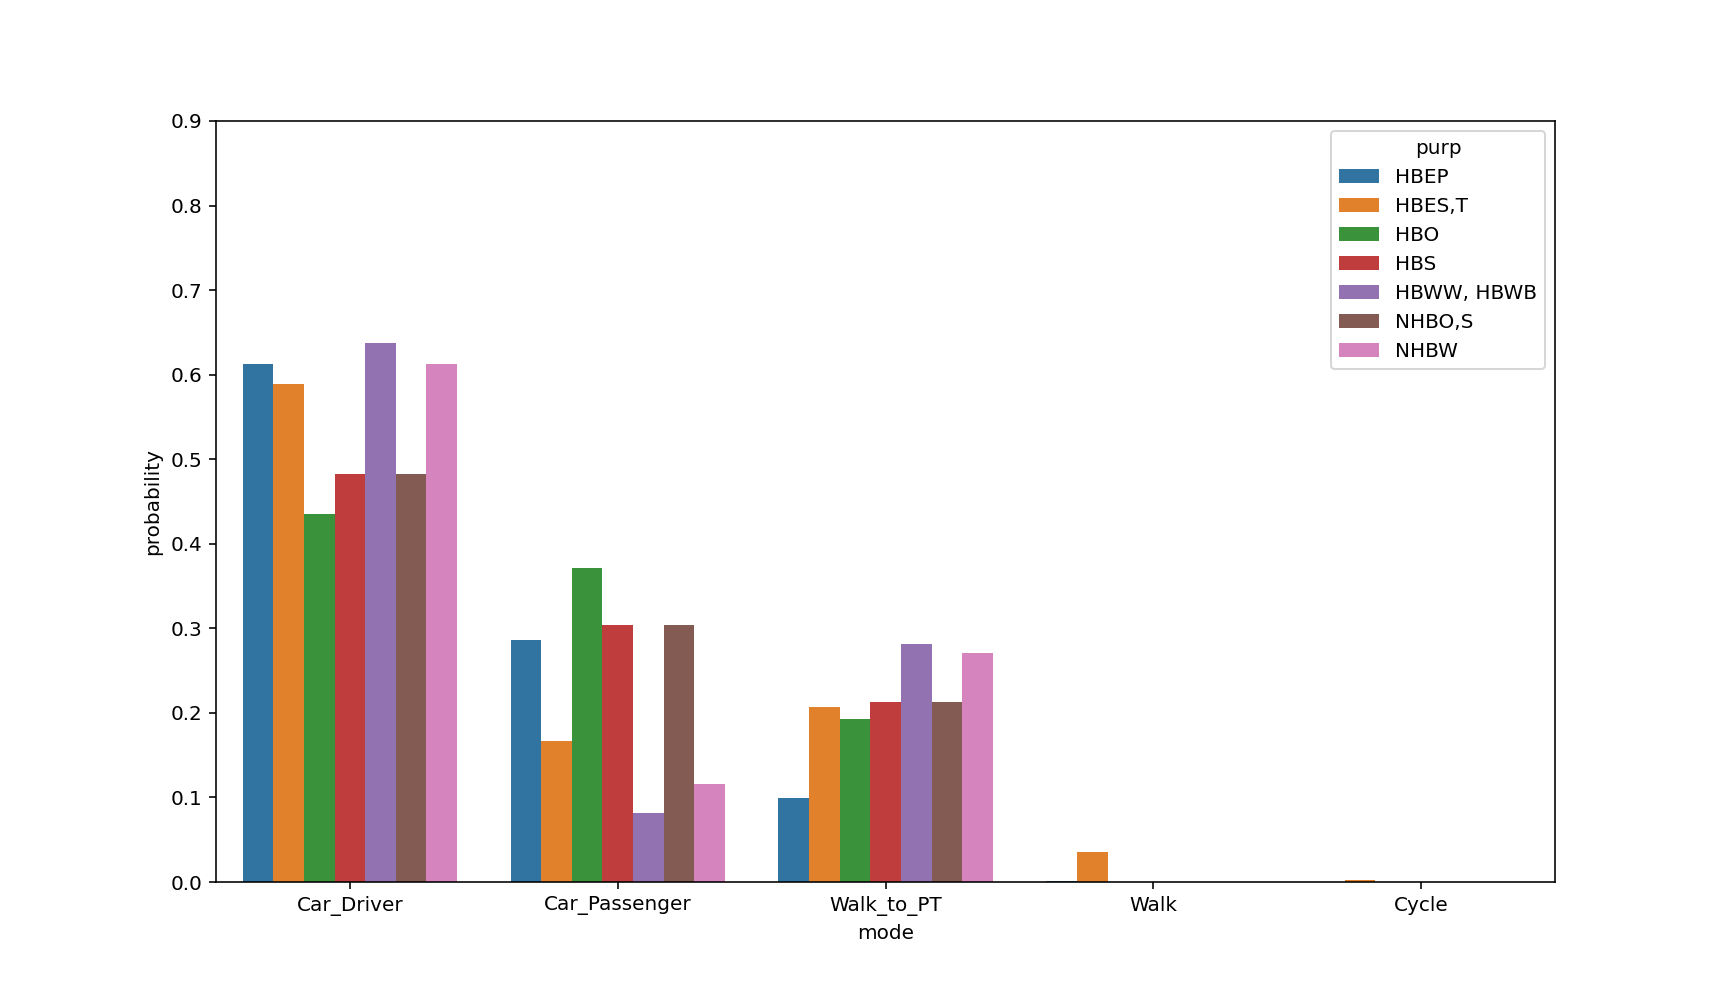

In [14]:
widgets   = pn.Column("<br>\n# Choice Inputs", distance, congestion_factor,parking_cost,PTTT,isin_congestion,fare, Pr_Car_Competition,Pr_No_Car_Available)
occupancy = pn.Row(reactive_probs, widgets)
occupancy